In [1]:
import pandas as pd

In [2]:
df_main = pd.read_csv("dataframes/incidenti_tfl_2019.csv")
df_ages = pd.read_csv("dataframes/age_range_counts_to_merge.csv")
df_vehicles = pd.read_csv("dataframes/vehicles_by_cat.csv")


In [3]:
print(df_main.keys())

df_main.head()

Index(['$type', 'id', 'lat', 'lon', 'location', 'date', 'severity', 'borough',
       'casualties', 'vehicles'],
      dtype='object')


,$type,id,lat,lon,location,date,severity,borough,casualties,vehicles
0,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345979,51.570865,-0.231959,On Edgware Road Near The Junction With north C...,2019-01-04T21:22:00Z,Slight,Barnet,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
1,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345980,51.603859,-0.187240,On Willow Way Near The Junction With Long Lane,2019-01-04T23:33:00Z,Slight,Barnet,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
2,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345981,51.512198,-0.153122,On north Audley Street Near The Junction With ...,2019-01-04T22:15:00Z,Slight,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
3,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345982,51.431480,-0.016083,On Bromley Road Near The Junction With Daneswo...,2019-01-04T18:00:00Z,Slight,Lewisham,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
4,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345983,51.473487,0.145202,On Belmont Road Near The Junction With Bedonwe...,2019-01-04T20:45:00Z,Slight,Bexley,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...


```json
exmpl = {
    "$type": "Tfl.Api.Presentation.Entities.AccidentStats.AccidentDetail, Tfl.Api.Presentation.Entities",
    "id": 345979,
    "lat": 51.570865,
    "lon": -0.231959,
    "location": "On Edgware Road Near The Junction With north Circular Road",
    "date": "2019-01-04T21:22:00Z",
    "severity": "Slight",
    "borough": "Barnet",
    "casualties": [{
        "$type": "Tfl.Api.Presentation.Entities.AccidentStats.Casualty, Tfl.Api.Presentation.Entities",
        "age": 20,
        "class": "Driver",
        "severity": "Slight",
        "mode": "PoweredTwoWheeler",
        "ageBand": "Adult"
    }],
    "vehicles": [{
        "$type": "Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities",
        "type": "Motorcycle_500cc_Plus"
    }, {
        "$type": "Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities",
        "type": "Car"
    }]
}
```

In [4]:
# Dropped unecessary cols
# General idea keep: [id, lat, lon, date, TOD, severity, boroughs..., casualties_age_range..., num_vehicles_per_type...]
df_main.drop(columns=['$type', 'location', 'casualties', 'vehicles'], inplace=True)

In [5]:
# converting 'severity' to cardinal indicator
df_main['severity'] = df_main['severity'].map({'Slight': 0, 'Serious': 1, 'Fatal': 2})

In [6]:
# Encode boroughs to OHE
borough_encoded = pd.get_dummies(df_main['borough'], prefix='borough', dtype=int)
df_main = pd.concat([df_main, borough_encoded], axis=1)
df_main.drop('borough', axis=1, inplace=True)


Dividing time_of_day using pd.cut(). Here the intervals have a practical meaning, so pd.cut() is better than pd.qcut().

In [7]:
# Time of day Pre Processing 
df_main['date'] = pd.to_datetime(df_main['date'])
# df_main['date'].dt.hour.plot.hist(bins=24, color='skyblue', edgecolor='black', alpha=0.7)
df_main['time_of_day'], bins = pd.cut(df_main['date'].dt.hour, bins=[0, 6, 12, 18, 24] , labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False, retbins=True)
print(bins)
df_main.head()

[ 0  6 12 18 24]


,id,lat,lon,date,severity,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,borough_Brent,borough_Bromley,...,borough_Merton,borough_Newham,borough_Redbridge,borough_Richmond upon Thames,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth,time_of_day
0,345979,51.570865,-0.231959,2019-01-04 21:22:00+00:00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Evening
1,345980,51.603859,-0.187240,2019-01-04 23:33:00+00:00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Evening
2,345981,51.512198,-0.153122,2019-01-04 22:15:00+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Evening
3,345982,51.431480,-0.016083,2019-01-04 18:00:00+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Evening
4,345983,51.473487,0.145202,2019-01-04 20:45:00+00:00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Evening


In [8]:
# Encode time_of_day to OHE
time_of_day_encoded = pd.get_dummies(df_main['time_of_day'], prefix='time_of_day', dtype=int)
df_main = pd.concat([df_main, time_of_day_encoded], axis=1)
df_main.drop('time_of_day', axis=1, inplace=True)
df_main.head()

,id,lat,lon,date,severity,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,borough_Brent,borough_Bromley,...,borough_Richmond upon Thames,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth,time_of_day_Night,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening
0,345979,51.570865,-0.231959,2019-01-04 21:22:00+00:00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,345980,51.603859,-0.187240,2019-01-04 23:33:00+00:00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,345981,51.512198,-0.153122,2019-01-04 22:15:00+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,345982,51.431480,-0.016083,2019-01-04 18:00:00+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,345983,51.473487,0.145202,2019-01-04 20:45:00+00:00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_main['month'] = df_main['date'].dt.month
df_main.head()

,id,lat,lon,date,severity,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,borough_Brent,borough_Bromley,...,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth,time_of_day_Night,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening,month
0,345979,51.570865,-0.231959,2019-01-04 21:22:00+00:00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,345980,51.603859,-0.187240,2019-01-04 23:33:00+00:00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,345981,51.512198,-0.153122,2019-01-04 22:15:00+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,345982,51.431480,-0.016083,2019-01-04 18:00:00+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,345983,51.473487,0.145202,2019-01-04 20:45:00+00:00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [10]:
df_main['day_of_week'] = df_main['date'].dt.day_name()
df_main['day_of_week'] = df_main['day_of_week'].map({'Monday':0, 'Tuesday':1, 'Wednesday': 2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6})
df_main.head()

,id,lat,lon,date,severity,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,borough_Brent,borough_Bromley,...,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth,time_of_day_Night,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening,month,day_of_week
0,345979,51.570865,-0.231959,2019-01-04 21:22:00+00:00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,4
1,345980,51.603859,-0.187240,2019-01-04 23:33:00+00:00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,4
2,345981,51.512198,-0.153122,2019-01-04 22:15:00+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4
3,345982,51.431480,-0.016083,2019-01-04 18:00:00+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4
4,345983,51.473487,0.145202,2019-01-04 20:45:00+00:00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,4


In [11]:
# Each Dataframe comes through pre processing in its own file

# CASUALTIES_AG_RANGE
df_merged = df_main.merge(df_ages, on='id', how='left')


# NUM OG VEHICLES PER TYPE
df_merged = df_merged.merge(df_vehicles, on='id', how='left')


print(df_merged.keys())
df_merged.head()

Index(['id', 'lat', 'lon', 'date', 'severity', 'borough_Barking and Dagenham',
       'borough_Barnet', 'borough_Bexley', 'borough_Brent', 'borough_Bromley',
       'borough_Camden', 'borough_City of London',
       'borough_City of Westminster', 'borough_Croydon', 'borough_Ealing',
       'borough_Enfield', 'borough_Greenwich', 'borough_Hackney',
       'borough_Hammersmith and Fulham', 'borough_Haringey', 'borough_Harrow',
       'borough_Havering', 'borough_Hillingdon', 'borough_Hounslow',
       'borough_Islington', 'borough_Kensington and Chelsea',
       'borough_Kingston', 'borough_Lambeth', 'borough_Lewisham',
       'borough_Merton', 'borough_Newham', 'borough_Redbridge',
       'borough_Richmond upon Thames', 'borough_Southwark', 'borough_Sutton',
       'borough_Tower Hamlets', 'borough_Waltham Forest', 'borough_Wandsworth',
       'time_of_day_Night', 'time_of_day_Morning', 'time_of_day_Afternoon',
       'time_of_day_Evening', 'month', 'day_of_week', 'casualty_age_0-23',
 

,id,lat,lon,date,severity,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,borough_Brent,borough_Bromley,...,casualty_age_0-23,casualty_age_24-30,casualty_age_31-38,casualty_age_39-50,casualty_age_50+,Car,Heavy_Vehicles,Motorcycle,Other,Pedalcycle
0,345979,51.570865,-0.231959,2019-01-04 21:22:00+00:00,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,345980,51.603859,-0.187240,2019-01-04 23:33:00+00:00,0,0,1,0,0,0,...,0,1,0,0,0,2,0,1,0,0
2,345981,51.512198,-0.153122,2019-01-04 22:15:00+00:00,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,345982,51.431480,-0.016083,2019-01-04 18:00:00+00:00,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,345983,51.473487,0.145202,2019-01-04 20:45:00+00:00,0,0,0,1,0,0,...,1,1,0,0,0,2,0,0,0,0


In [12]:
df_merged.to_csv('dataframes/merged_nov_29.csv', index=False)

In [13]:
df_merged.columns

Index(['id', 'lat', 'lon', 'date', 'severity', 'borough_Barking and Dagenham',
       'borough_Barnet', 'borough_Bexley', 'borough_Brent', 'borough_Bromley',
       'borough_Camden', 'borough_City of London',
       'borough_City of Westminster', 'borough_Croydon', 'borough_Ealing',
       'borough_Enfield', 'borough_Greenwich', 'borough_Hackney',
       'borough_Hammersmith and Fulham', 'borough_Haringey', 'borough_Harrow',
       'borough_Havering', 'borough_Hillingdon', 'borough_Hounslow',
       'borough_Islington', 'borough_Kensington and Chelsea',
       'borough_Kingston', 'borough_Lambeth', 'borough_Lewisham',
       'borough_Merton', 'borough_Newham', 'borough_Redbridge',
       'borough_Richmond upon Thames', 'borough_Southwark', 'borough_Sutton',
       'borough_Tower Hamlets', 'borough_Waltham Forest', 'borough_Wandsworth',
       'time_of_day_Night', 'time_of_day_Morning', 'time_of_day_Afternoon',
       'time_of_day_Evening', 'month', 'day_of_week', 'casualty_age_0-23',
 

Let's explore the target variable

<Axes: xlabel='severity'>

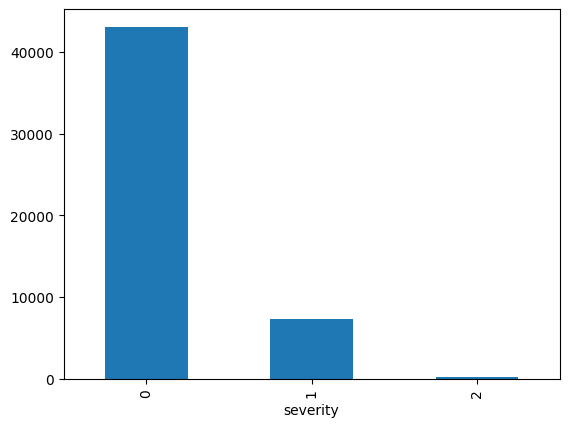

In [14]:
df_merged['severity'].value_counts().plot(kind='bar')

In [15]:
print(df_merged['severity'].value_counts())

severity
0    43060
1     7326
2      240
Name: count, dtype: int64


As we can see, the target variable is extremely imbalanced. When classifying we might wanna specify the 'class_weight' argument of the classifier, in order to soften the effect of the imbalance of the target class.

Computing the proportion of accidents (by severity) for each borough and time_of_day.

In [16]:
boroughs = ['borough_Barking and Dagenham',
       'borough_Barnet', 'borough_Bexley', 'borough_Brent', 'borough_Bromley',
       'borough_Camden', 'borough_City of London',
       'borough_City of Westminster', 'borough_Croydon', 'borough_Ealing',
       'borough_Enfield', 'borough_Greenwich', 'borough_Hackney',
       'borough_Hammersmith and Fulham', 'borough_Haringey', 'borough_Harrow',
       'borough_Havering', 'borough_Hillingdon', 'borough_Hounslow',
       'borough_Islington', 'borough_Kensington and Chelsea',
       'borough_Kingston', 'borough_Lambeth', 'borough_Lewisham',
       'borough_Merton', 'borough_Newham', 'borough_Redbridge',
       'borough_Richmond upon Thames', 'borough_Southwark', 'borough_Sutton',
       'borough_Tower Hamlets', 'borough_Waltham Forest', 'borough_Wandsworth']

df_merged.groupby('severity')[boroughs].mean()


,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,borough_Brent,borough_Bromley,borough_Camden,borough_City of London,borough_City of Westminster,borough_Croydon,borough_Ealing,...,borough_Lewisham,borough_Merton,borough_Newham,borough_Redbridge,borough_Richmond upon Thames,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth
severity,,,,,,,,,,,,,,,,,,,,,
0,0.024245,0.037575,0.018765,0.034603,0.028240,0.036136,0.011426,0.059313,0.036925,0.039248,...,0.031630,0.017882,0.034882,0.028054,0.016117,0.043381,0.017557,0.044682,0.026289,0.036507
1,0.021840,0.036855,0.018564,0.030030,0.025935,0.037401,0.019656,0.064155,0.041496,0.036855,...,0.030303,0.022932,0.034398,0.025389,0.019110,0.043134,0.016653,0.041223,0.024570,0.041496
2,0.033333,0.033333,0.025000,0.050000,0.050000,0.033333,0.008333,0.033333,0.058333,0.025000,...,0.025000,0.066667,0.016667,0.016667,0.016667,0.008333,0.025000,0.025000,0.025000,0.058333


In [17]:
time_of_day = ['time_of_day_Night', 'time_of_day_Morning', 'time_of_day_Afternoon',
       'time_of_day_Evening']

df_merged.groupby('severity')[time_of_day].mean()


,time_of_day_Night,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening
severity,,,,
0,0.068741,0.265211,0.377984,0.288063
1,0.089817,0.255528,0.343161,0.311493
2,0.200000,0.191667,0.266667,0.341667


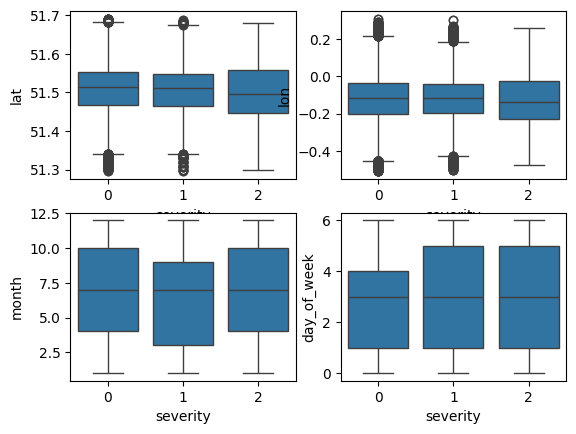

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

num_cols = ['lat', 'lon', 'month', 'day_of_week']
fig, ax = plt.subplots(nrows=2, ncols=2)

for i, col in enumerate(num_cols):
    sns.boxplot(x='severity', y=col, data=df_merged, ax=ax.flatten()[i])


In [19]:
df_merged.drop(columns=['id','date','casualty_age_0-23',
       'casualty_age_24-30', 'casualty_age_31-38', 'casualty_age_39-50',
       'casualty_age_50+', 'Car', 'Heavy_Vehicles', 'Motorcycle', 'Other',
       'Pedalcycle'], inplace=True)

##DEBUG##
Testing compatibility between XGboost and scikit-learn with this sample code.

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Genera dati sintetici
X, y = np.random.rand(100, 10), np.random.randint(0, 3, size=100)  # 3 classi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modello XGBClassifier
model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42
)

# Fit del modello
model.fit(X_train, y_train)

# Predizione
y_pred = model.predict(X_test)
print("Predictions:", y_pred)


Predictions: [0 1 0 2 1 1 2 0 2 2 1 2 2 0 1 0 2 0 0 0]


In [21]:
from sklearn.model_selection import train_test_split

X = df_merged.drop(columns=['severity'])
y = df_merged['severity']  # Assicurati che sia numerico o mappato (1, 2, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40500, 41)
(10126, 41)
(40500,)
(10126,)


To handle the imbalance of out target class, we can exploit the sample_weight parameter of XGBClassifier.fit(). This is an example of **cost-sensitive learning**.

In [23]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

random_state=42

sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

model = XGBClassifier(random_state=random_state)
model.fit(X_train, y_train, sample_weight=sample_weights)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

              precision    recall  f1-score   support

           0      0.919     0.747     0.824      8596
           1      0.304     0.627     0.410      1478
           2      0.323     0.577     0.414        52

    accuracy                          0.729     10126
   macro avg      0.515     0.650     0.549     10126
weighted avg      0.826     0.729     0.762     10126



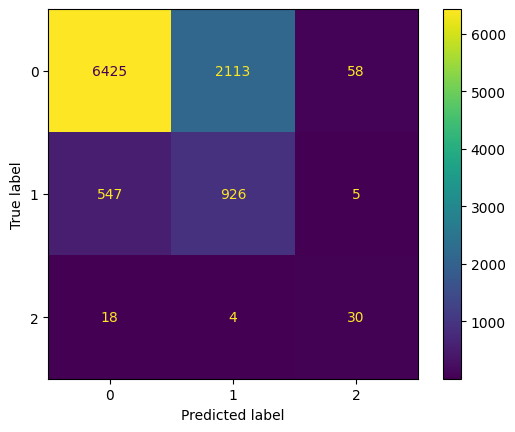

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)

disp.plot()
plt.show()

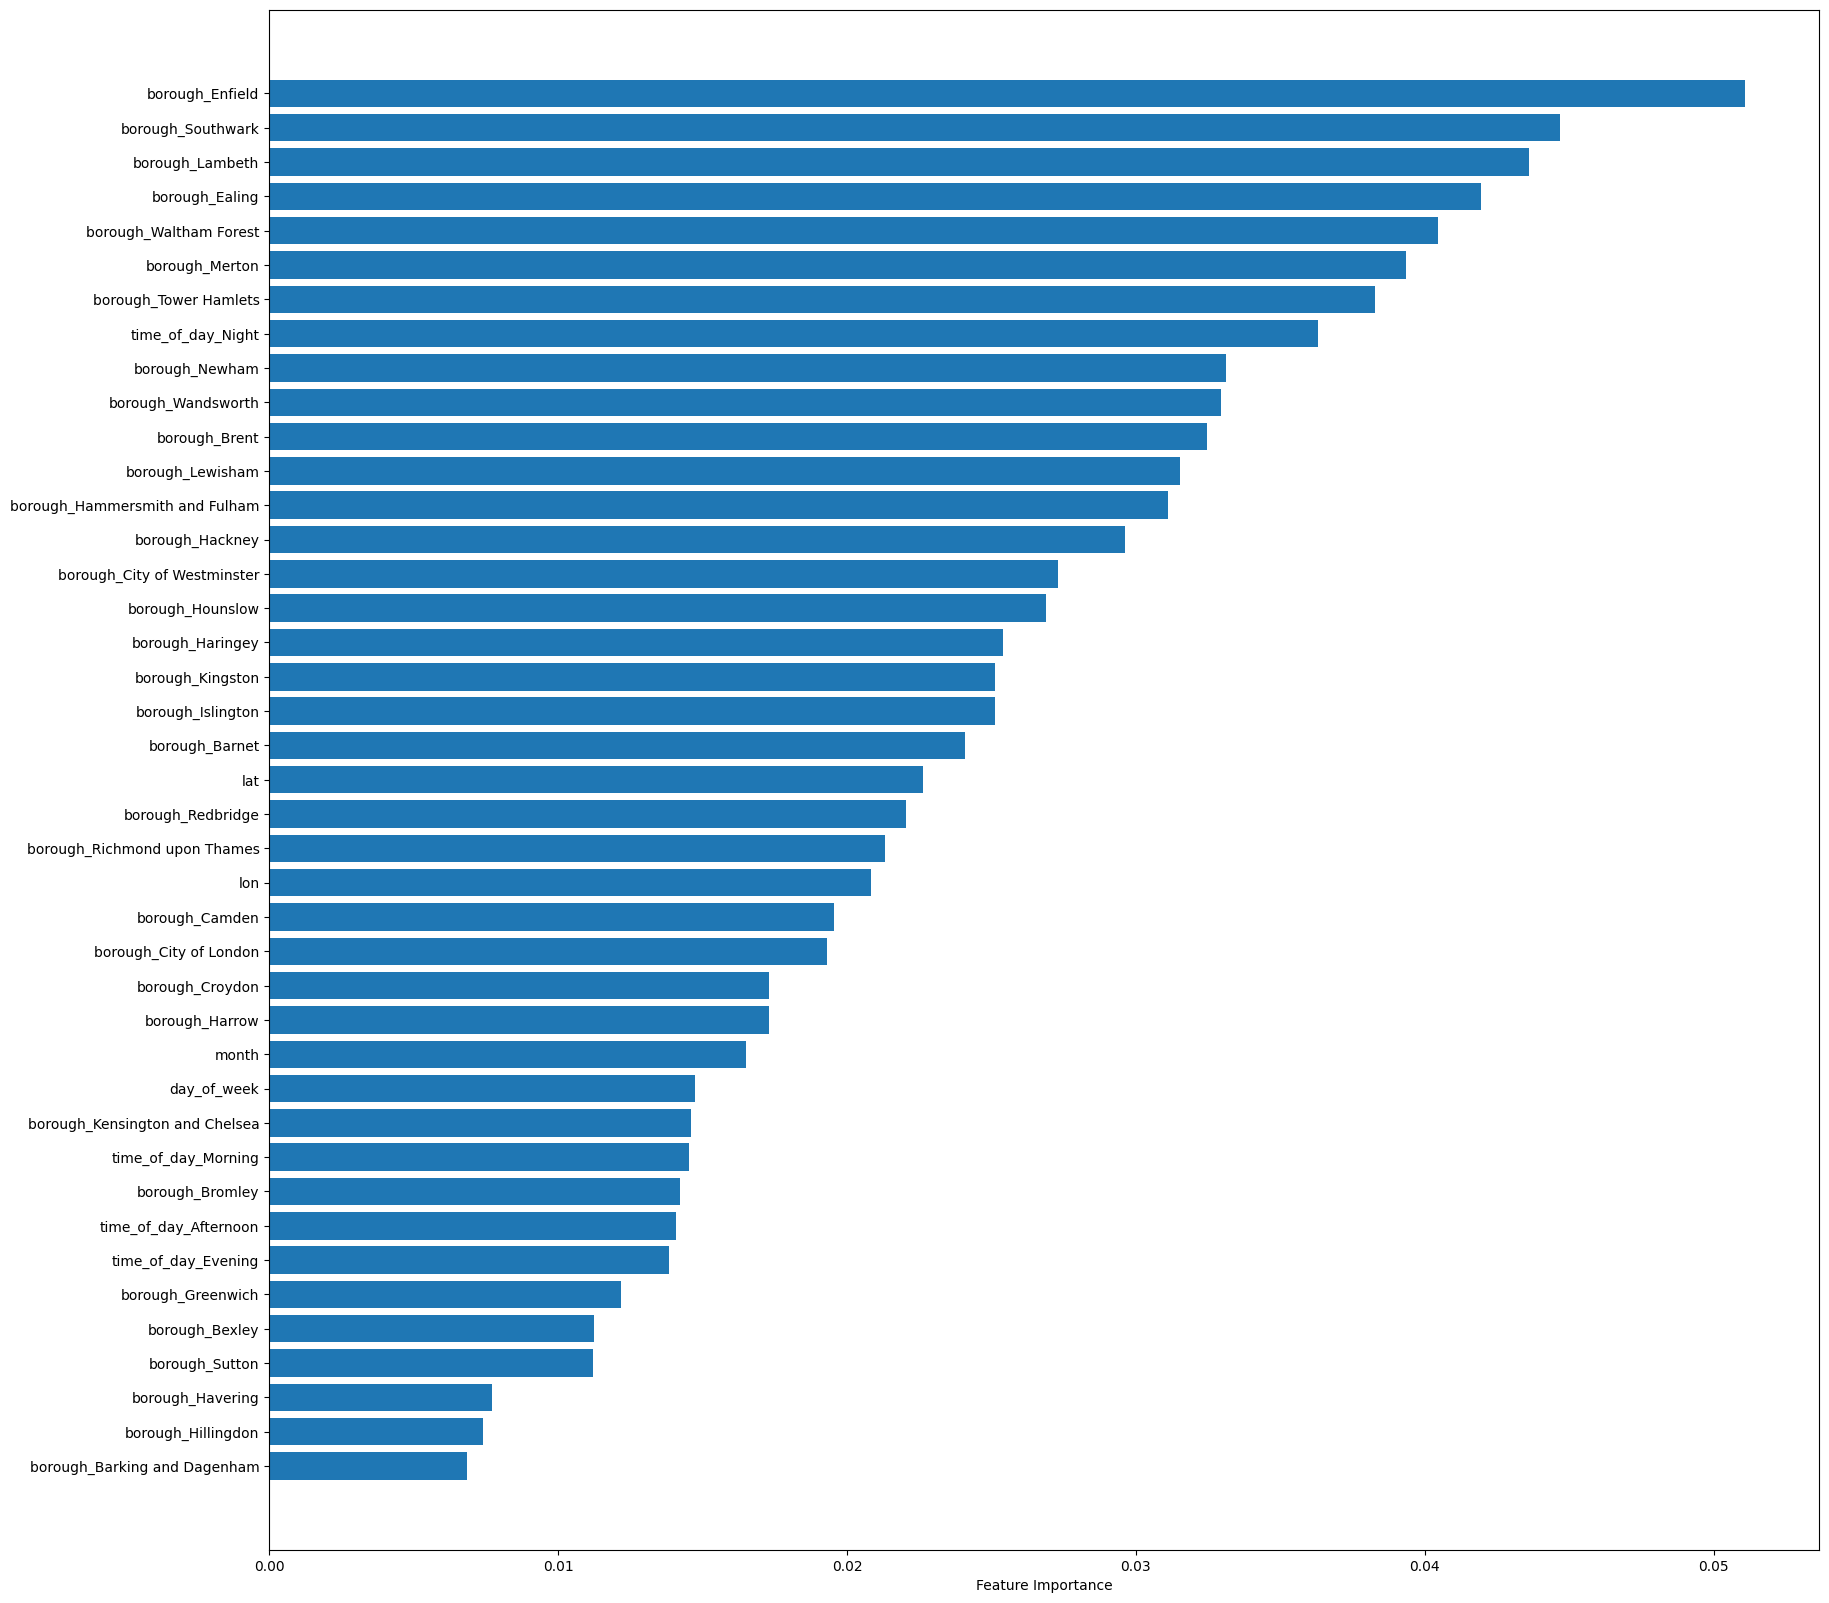

In [25]:
feature_importance = model.feature_importances_
plt.figure(figsize=(20,20))
sorted_idx = np.argsort(feature_importance)
plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

## SGBoost with GridSearch

Fitting 3 folds for each of 8 candidates, totalling 24 fits


d:\homy\S9\Artificial_intellegence_in_industry\ai_industry\venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "d:\homy\S9\Artificial_intellegence_in_industry\ai_industry\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\homy\S9\Artificial_intellegence_in_industry\ai_industry\venv\Lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "d:\homy\S9\Artificial_intellegence_in_indus


Best Parameters: {'learning_rate': 0.3, 'max_depth': 11, 'subsample': 1.0}
Best F1 Score: 0.8746151684621108

Classification Report:
              precision    recall  f1-score   support

      Slight      0.955     0.895     0.924      8613
     Serious      0.553     0.763     0.642      1465
       Fatal      0.788     0.542     0.642        48

    accuracy                          0.874     10126
   macro avg      0.765     0.733     0.736     10126
weighted avg      0.896     0.874     0.882     10126



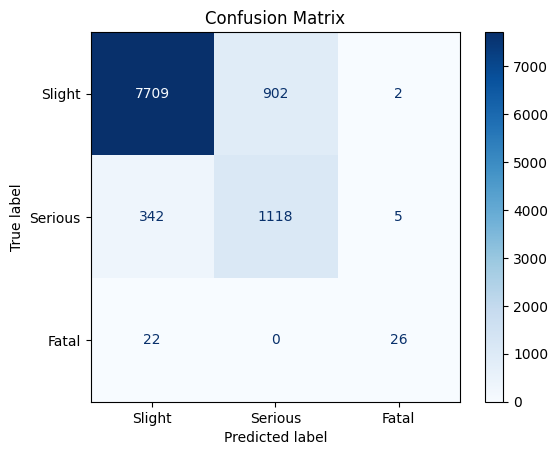

In [26]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np
import pandas as pd

if 'df_merged' not in locals():
    raise ValueError("df_merged is not defined. Ensure the dataset is loaded.")

X = df_merged.drop(columns=['severity'])
y = df_merged['severity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

sample_weights = compute_sample_weight(class_weight='balanced', y=y_res)

param_grid = {
    'learning_rate': [ 0.2,0.3],
    'max_depth': [  9,11],
    'subsample': [  1.0,1.2],
    # 'colsample_bytree': [0.6, 0.8, 1.0],
    # 'n_estimators': [100, 200, 300],
    # 'gamma': [0, 0.1, 0.2],
    # 'reg_alpha': [0.0, 0.1, 1.0],
    # 'reg_lambda': [1.0, 1.5, 2.0],
}

xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y)),
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_macro',  
    cv=3,                
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_res, y_res, sample_weight=sample_weights)

print("\nBest Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

model_xgb_adysin = grid_search.best_estimator_

y_pred = model_xgb_adysin.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Slight', 'Serious', 'Fatal'], digits=3))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Slight', 'Serious', 'Fatal'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score

xbm_score_cv = grid_search.best_score_  
y_proba      = model_xgb_adysin.predict_proba(X_test)
xbm_score_test = roc_auc_score(y_test, y_proba, multi_class='ovr')
xbm_params     = grid_search.best_params_

print(f'AUC score for {xbm_params}: {xbm_score_cv:.2f} (cross-val.), {xbm_score_test:.2f} (test)')

AUC score for {'learning_rate': 0.3, 'max_depth': 11, 'subsample': 1.0}: 0.87 (cross-val.), 0.89 (test)


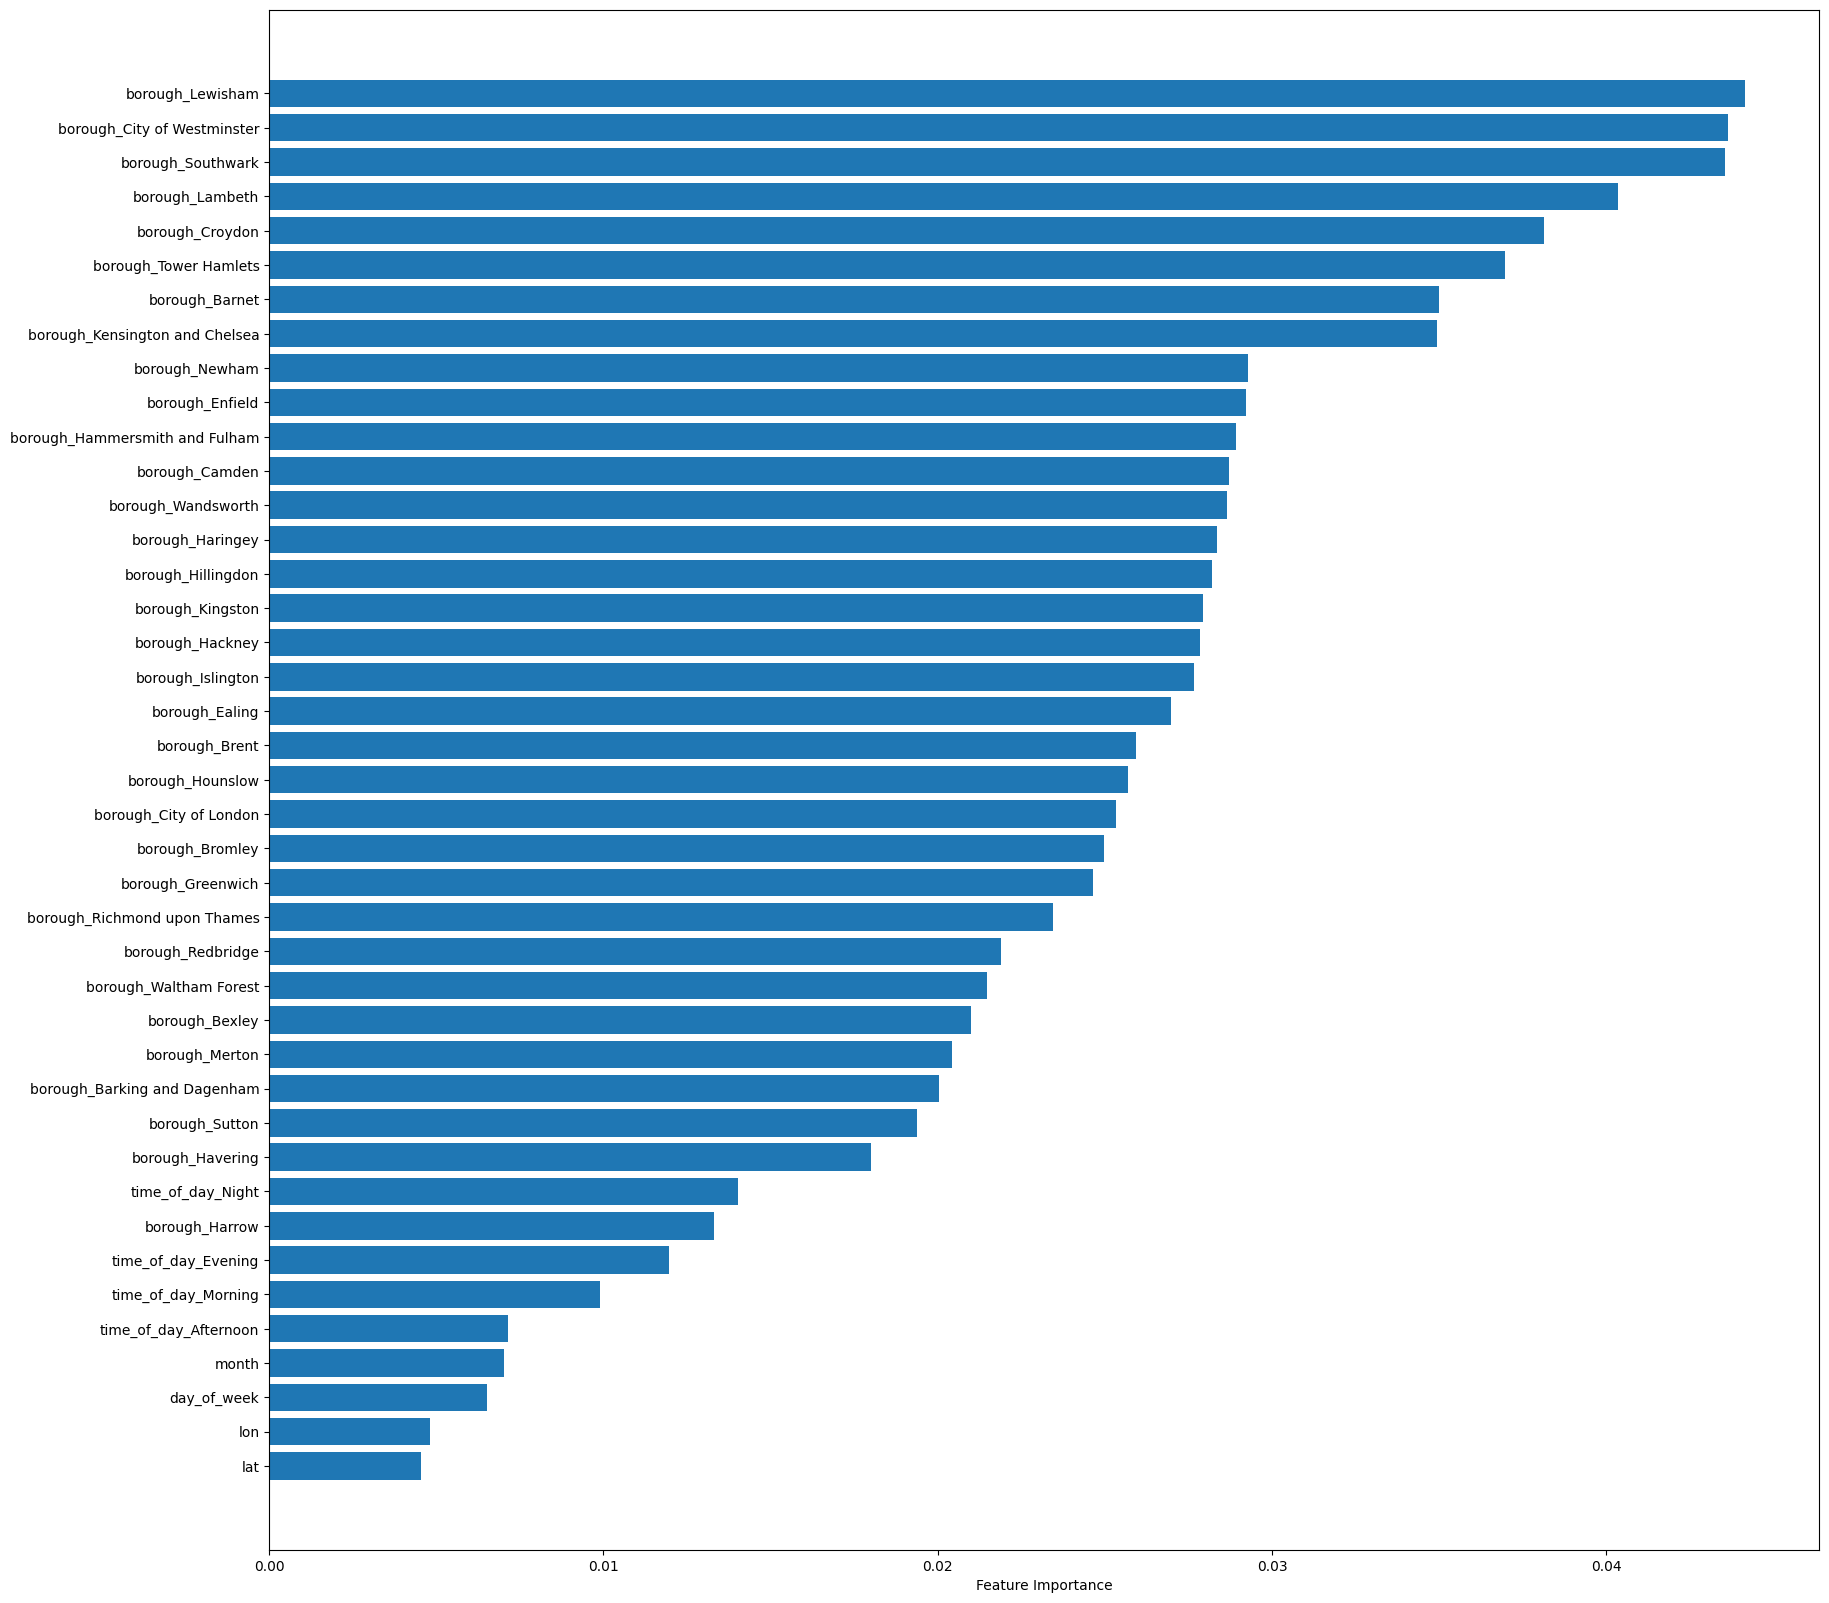

In [28]:
feature_importance = model_xgb_adysin.feature_importances_
plt.figure(figsize=(20,20))
sorted_idx = np.argsort(feature_importance)
plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

### XGBoost with Permutation

In [30]:
from sklearn.inspection import permutation_importance

r_train = permutation_importance(model, X_train, y_train, n_repeats=30, random_state=42)
xbm_p_imp = pd.Series(index=X.columns, data=r_train.importances_mean)

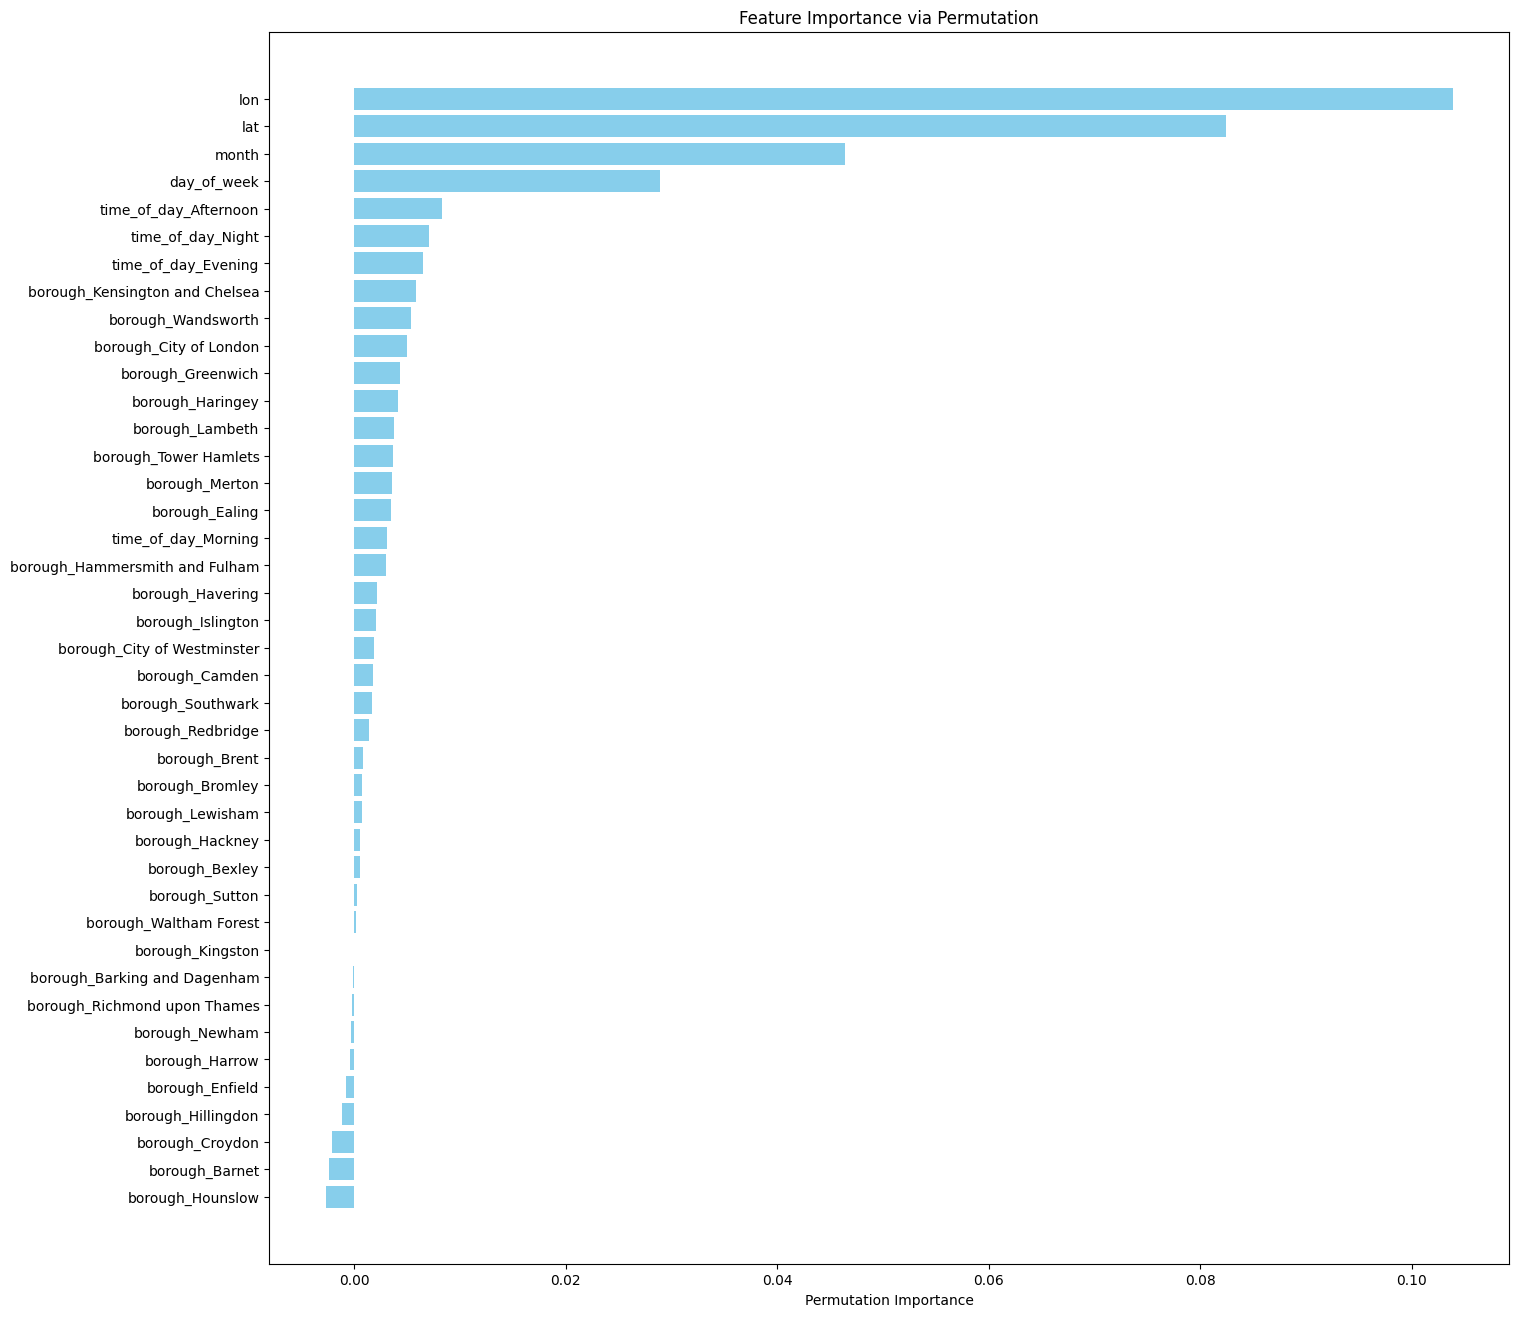

In [ ]:
sorted_idx = r_train.importances_mean.argsort()

plt.figure(figsize=(16, 16))
plt.barh(X_train.columns[sorted_idx], r_train.importances_mean[sorted_idx], color="skyblue")
plt.xlabel("Permutation Importance")
plt.title("Feature Importance via Permutation")
plt.show()

### Model XGB With Adysin in permutation

In [31]:
from sklearn.inspection import permutation_importance

r_train = permutation_importance(model_xgb_adysin, X_train, y_train, n_repeats=30, random_state=42)
xbm_p_imp = pd.Series(index=X.columns, data=r_train.importances_mean)

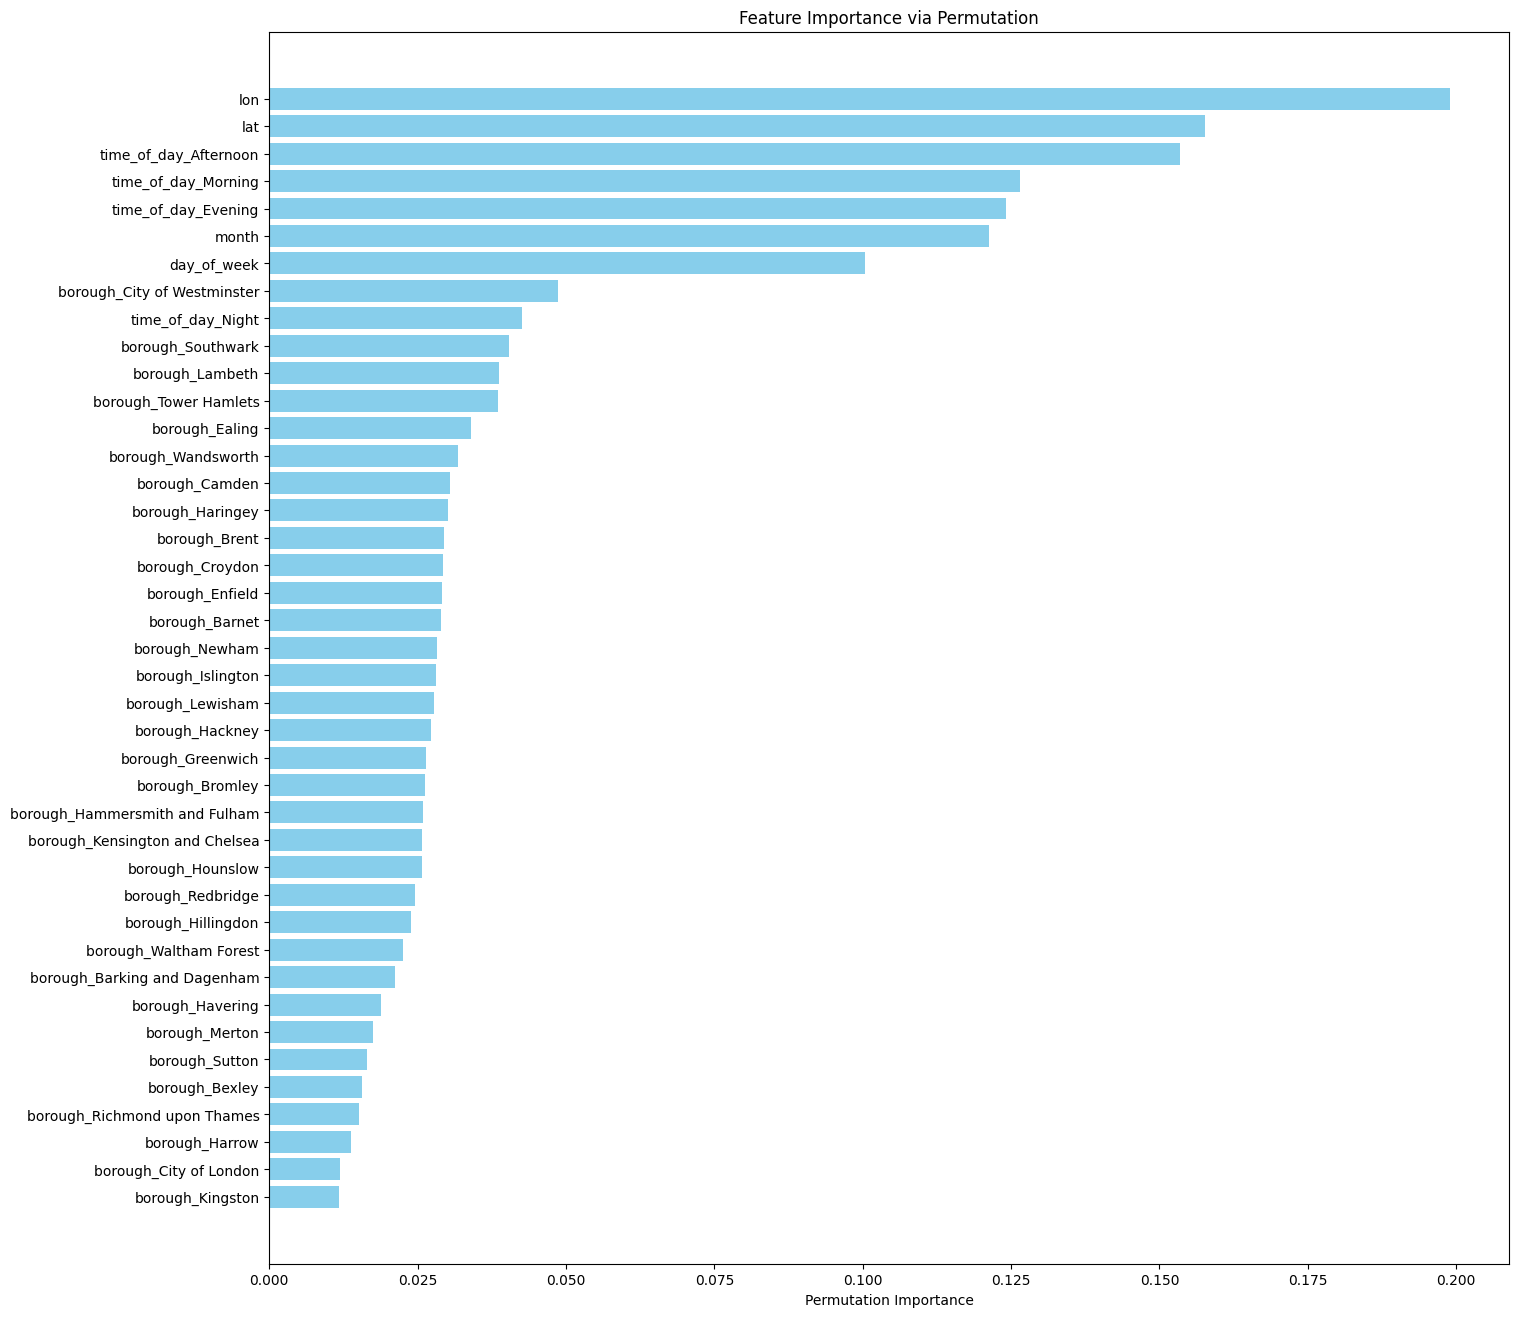

In [32]:
sorted_idx = r_train.importances_mean.argsort()

plt.figure(figsize=(16, 16))
plt.barh(X_train.columns[sorted_idx], r_train.importances_mean[sorted_idx], color="skyblue")
plt.xlabel("Permutation Importance")
plt.title("Feature Importance via Permutation")
plt.show()

Let's explore the target variable

<Axes: xlabel='severity'>

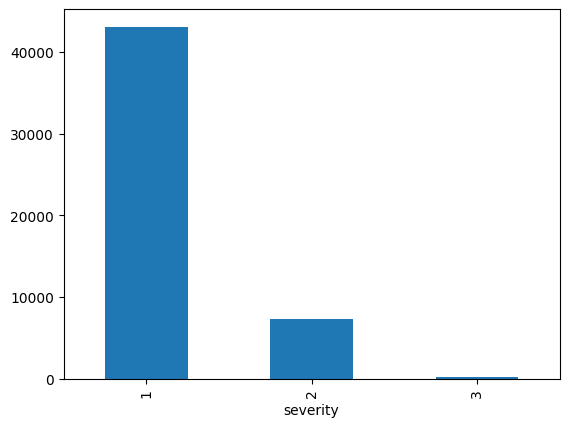

In [16]:
df_merged['severity'].value_counts().plot(kind='bar')


In [17]:
print(df_merged['severity'].value_counts())


severity
1    43060
2     7326
3      240
Name: count, dtype: int64


________________________________________________________________________________
________________________________________________________________________________
________________________________________________________________________________
________________________________________________________________________________


# Function Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score
)
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import ADASYN

from xgboost import XGBClassifier

from sklearn.inspection import permutation_importance

def analyze_balancing_approaches(
    df_merged,
    approach="none",        
    shuffle_data=True,    
    param_grid=None,       
    random_state=42
):
   
    if 'severity' not in df_merged.columns:
        raise ValueError("The DataFrame must contain a 'severity' column as the target.")

    if param_grid is None:
        param_grid = {
            'learning_rate': [0.2, 0.3],
            'max_depth': [9, 11],
            'subsample': [0.8, 1.0],  
            # 'colsample_bytree': [0.6, 0.8, 1.0],
            # 'n_estimators': [100, 200, 300],
            # 'gamma': [0, 0.1, 0.2],
            # 'reg_alpha': [0.0, 0.1, 1.0],
            # 'reg_lambda': [1.0, 1.5, 2.0],
        }


    X = df_merged.drop(columns=['severity'])
    y = df_merged['severity']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        stratify=y,         
        shuffle=shuffle_data,
        random_state=random_state
    )


    if approach == "none":
        X_train_res, y_train_res = X_train.copy(), y_train.copy()
        X_test_res, y_test_res   = X_test.copy(), y_test.copy()

    elif approach == "entire":
        adasyn_entire = ADASYN(random_state=random_state)
        X_train_res, y_train_res = adasyn_entire.fit_resample(X_train, y_train)

        adasyn_entire_test = ADASYN(random_state=random_state + 1)
        X_test_res, y_test_res = adasyn_entire_test.fit_resample(X_test, y_test)

    elif approach == "train_only":
        adasyn_train = ADASYN(random_state=random_state)
        X_train_res, y_train_res = adasyn_train.fit_resample(X_train, y_train)

        X_test_res, y_test_res = X_test.copy(), y_test.copy()

    elif approach == "test_only":
        X_train_res, y_train_res = X_train.copy(), y_train.copy()

        adasyn_test = ADASYN(random_state=random_state)
        X_test_res, y_test_res = adasyn_test.fit_resample(X_test, y_test)

    else:
        raise ValueError(
            "approach must be one of ['none', 'entire', 'train_only', 'test_only']"
        )


    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_res)

    xgb_model = XGBClassifier(
        objective='multi:softprob',
        num_class=len(np.unique(y)), 
        eval_metric='mlogloss',
        random_state=random_state,
        n_jobs=-1
    )

    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='f1_macro', 
        cv=3,
        verbose=2,
        n_jobs=-1
    )

    grid_search.fit(X_train_res, y_train_res, sample_weight=sample_weights)
    model = grid_search.best_estimator_

    print("\n===== Grid Search Results =====")
    print("Best Parameters:", grid_search.best_params_)
    print("Best F1 (CV):", grid_search.best_score_)

    y_pred = model.predict(X_test_res)

    print("\n===== Classification Report (Test) =====")
    print(classification_report(
        y_test_res, y_pred,
        target_names=['Slight', 'Serious', 'Fatal'],
        digits=3
    ))

    cm = confusion_matrix(y_test_res, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['Slight', 'Serious', 'Fatal']
    )
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

    y_proba = model.predict_proba(X_test_res)
    auc_test = roc_auc_score(y_test_res, y_proba, multi_class='ovr')
    print(f"\nAUC (Test) = {auc_test:.3f}")


    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    plt.figure(figsize=(10, 8))
    plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx], color="skyblue")
    plt.xlabel("Feature Importance (XGBoost built-in)")
    plt.title("Feature Importance by Gain")
    plt.tight_layout()
    plt.show()
    r_train = permutation_importance(
        model,
        X_train_res,
        y_train_res,
        n_repeats=30,
        random_state=random_state
    )

    perm_sorted_idx = r_train.importances_mean.argsort()

    plt.figure(figsize=(10, 8))
    plt.barh(X_train.columns[perm_sorted_idx],
             r_train.importances_mean[perm_sorted_idx],
             color="skyblue")
    plt.xlabel("Permutation Importance")
    plt.title("Feature Importance via Permutation")
    plt.tight_layout()
    plt.show()

    return model, grid_search




As we can see, the target variable is extremely imbalanced.

Fitting 3 folds for each of 8 candidates, totalling 24 fits

===== Grid Search Results =====
Best Parameters: {'learning_rate': 0.3, 'max_depth': 11, 'subsample': 0.8}
Best F1 (CV): 0.7251700350667645

===== Classification Report (Test) =====
              precision    recall  f1-score   support

      Slight      0.967     0.951     0.959      8613
     Serious      0.737     0.814     0.774      1465
       Fatal      0.905     0.792     0.844        48

    accuracy                          0.930     10126
   macro avg      0.870     0.852     0.859     10126
weighted avg      0.934     0.930     0.931     10126



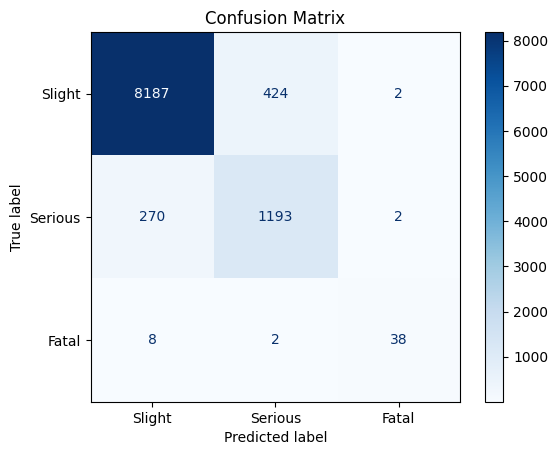


AUC (Test) = 0.895


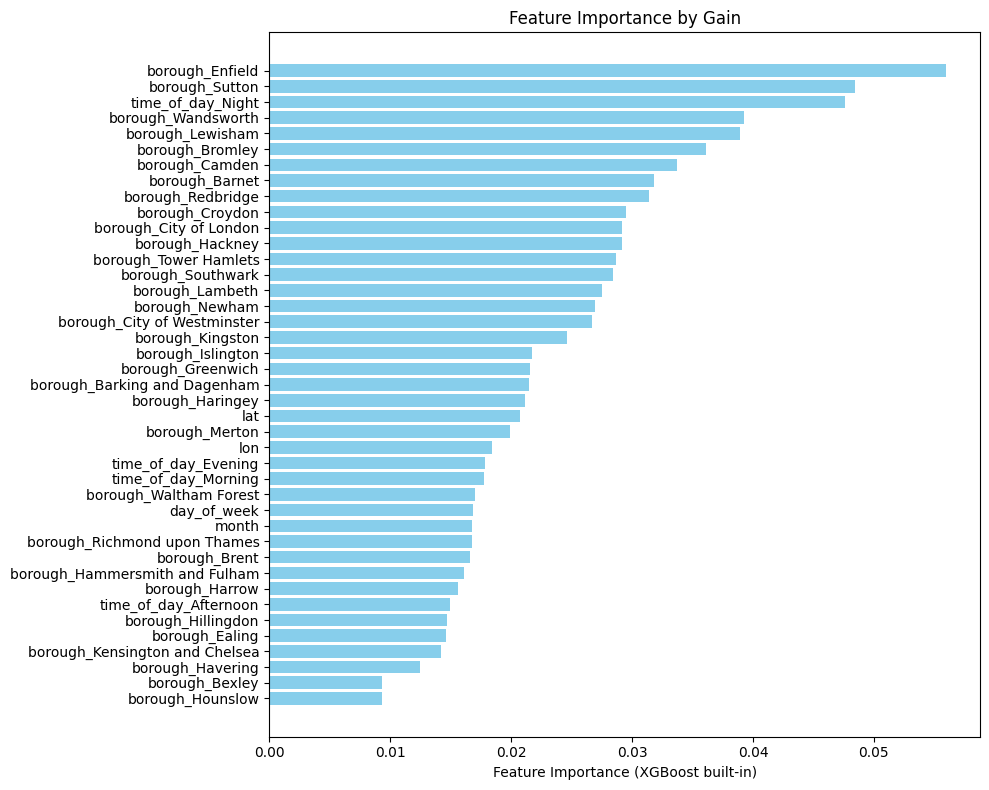

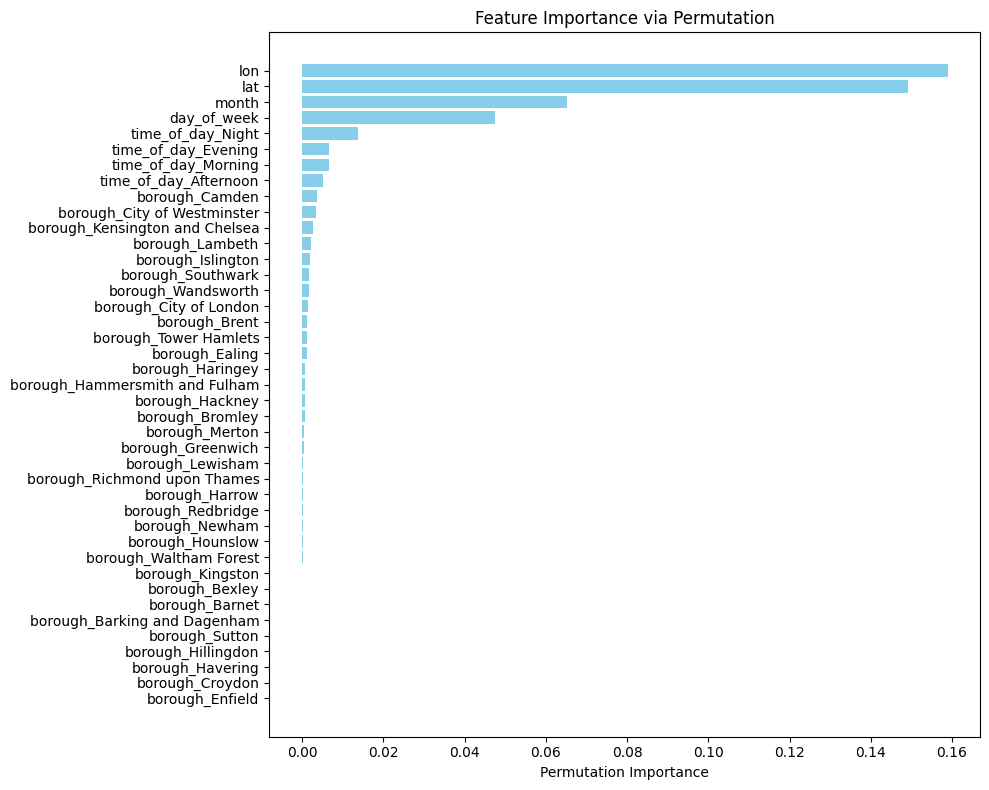

In [34]:
model_none, gs_none = analyze_balancing_approaches(df_merged, approach="none")


Fitting 3 folds for each of 8 candidates, totalling 24 fits

===== Grid Search Results =====
Best Parameters: {'learning_rate': 0.3, 'max_depth': 11, 'subsample': 0.8}
Best F1 (CV): 0.8796628817914435

===== Classification Report (Test) =====
              precision    recall  f1-score   support

      Slight      0.842     0.919     0.879      8613
     Serious      0.817     0.724     0.767      8898
       Fatal      0.845     0.867     0.856      8606

    accuracy                          0.835     26117
   macro avg      0.835     0.837     0.834     26117
weighted avg      0.834     0.835     0.833     26117



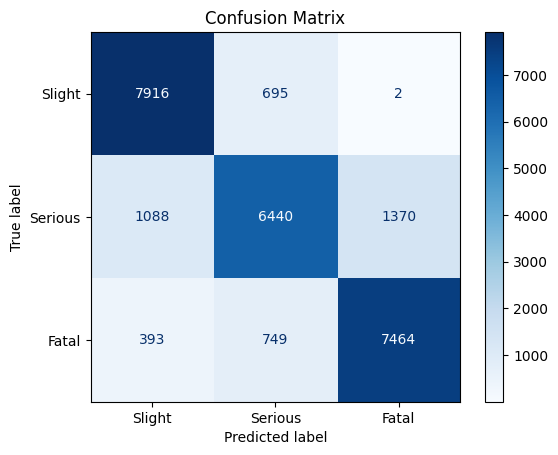


AUC (Test) = 0.936


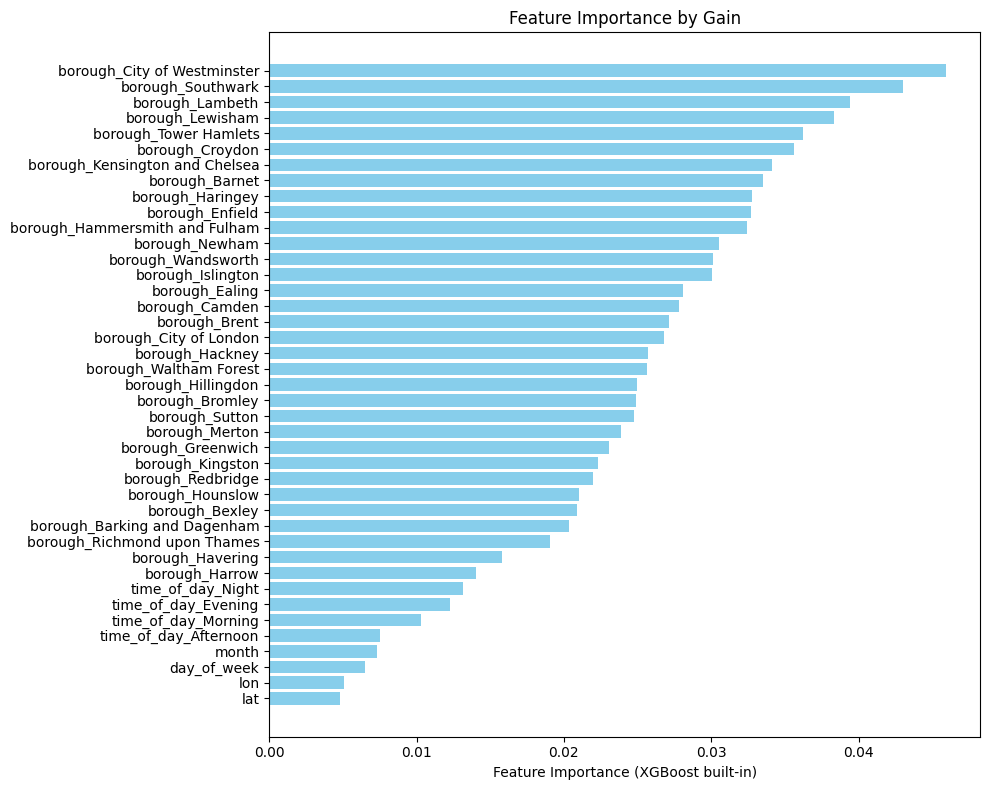

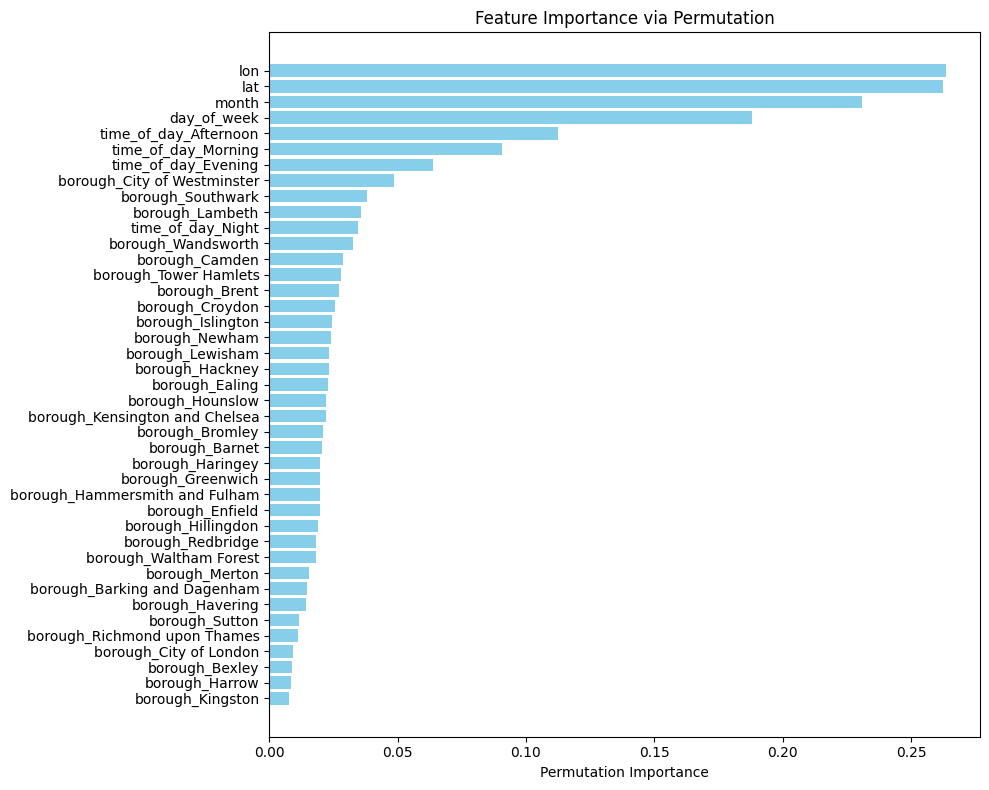

In [35]:
model_entire, gs_entire = analyze_balancing_approaches(df_merged, approach="entire")


Fitting 3 folds for each of 8 candidates, totalling 24 fits

===== Grid Search Results =====
Best Parameters: {'learning_rate': 0.3, 'max_depth': 11, 'subsample': 0.8}
Best F1 (CV): 0.8796628817914435

===== Classification Report (Test) =====
              precision    recall  f1-score   support

      Slight      0.956     0.919     0.937      8613
     Serious      0.615     0.766     0.682      1465
       Fatal      0.737     0.292     0.418        48

    accuracy                          0.894     10126
   macro avg      0.769     0.659     0.679     10126
weighted avg      0.905     0.894     0.898     10126



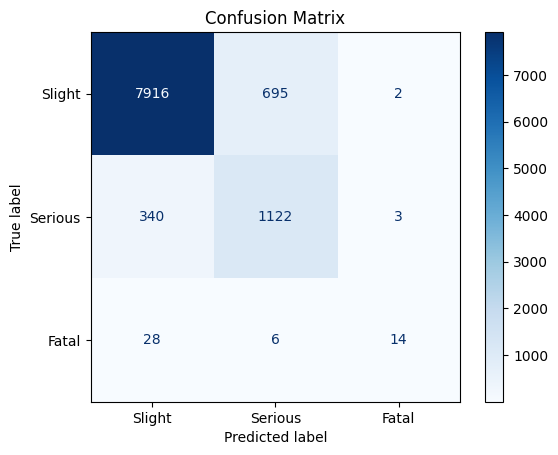


AUC (Test) = 0.885


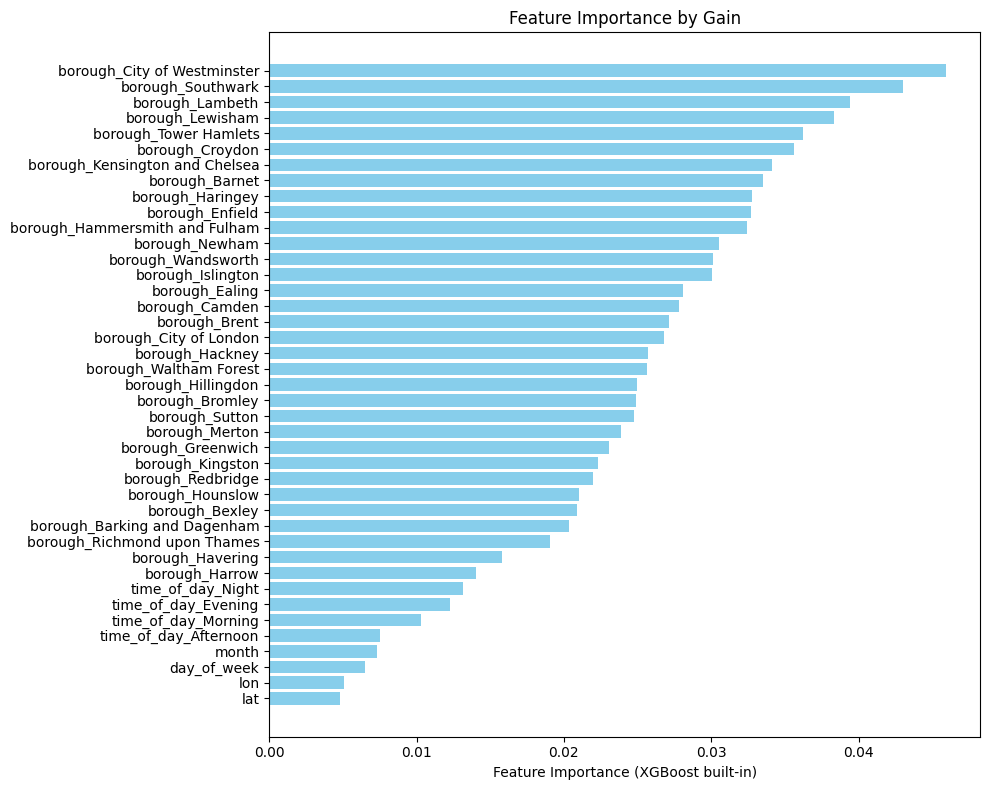

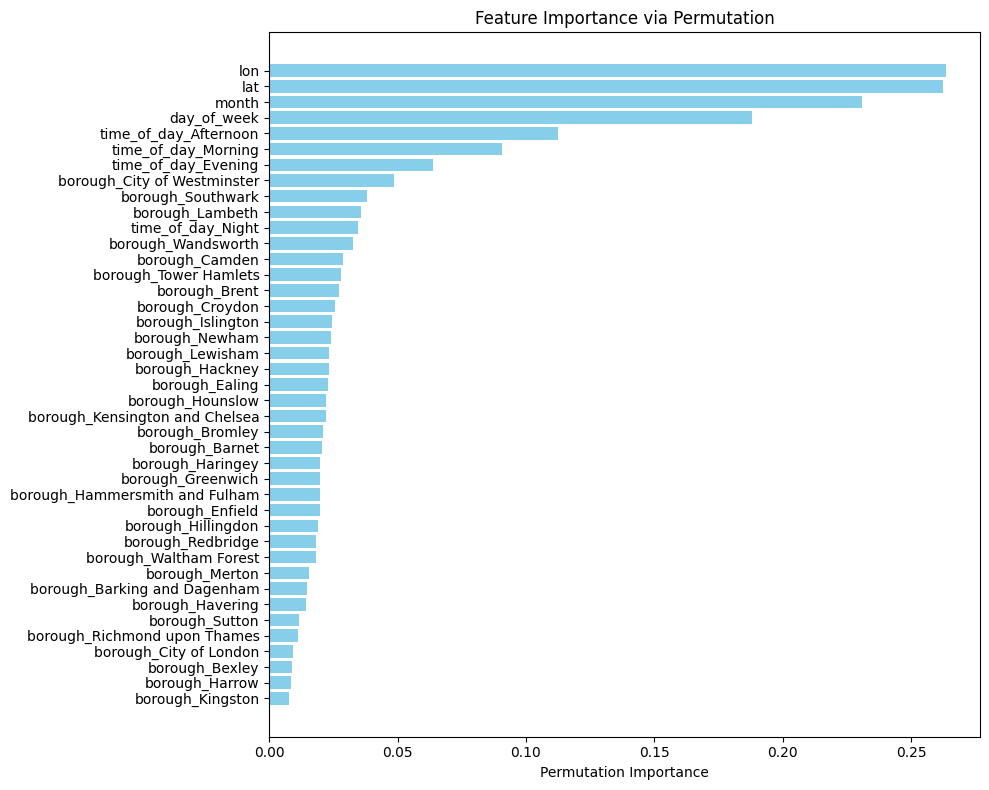

In [36]:
model_train, gs_train = analyze_balancing_approaches(df_merged, approach="train_only")


Fitting 3 folds for each of 8 candidates, totalling 24 fits

===== Grid Search Results =====
Best Parameters: {'learning_rate': 0.3, 'max_depth': 11, 'subsample': 0.8}
Best F1 (CV): 0.7251700350667645

===== Classification Report (Test) =====
              precision    recall  f1-score   support

      Slight      0.386     0.951     0.549      8613
     Serious      0.625     0.319     0.422      8898
       Fatal      0.974     0.043     0.083      8606

    accuracy                          0.436     26117
   macro avg      0.662     0.438     0.352     26117
weighted avg      0.661     0.436     0.352     26117



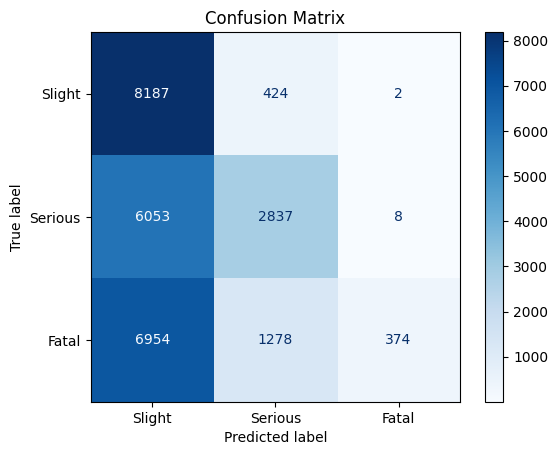


AUC (Test) = 0.731


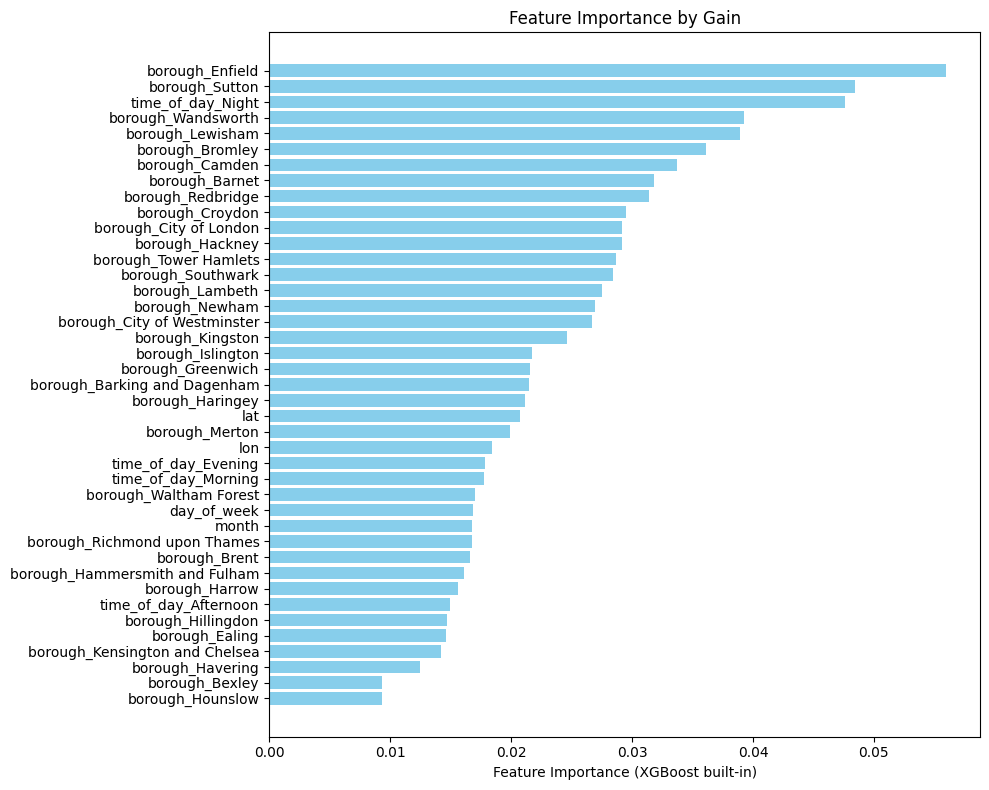

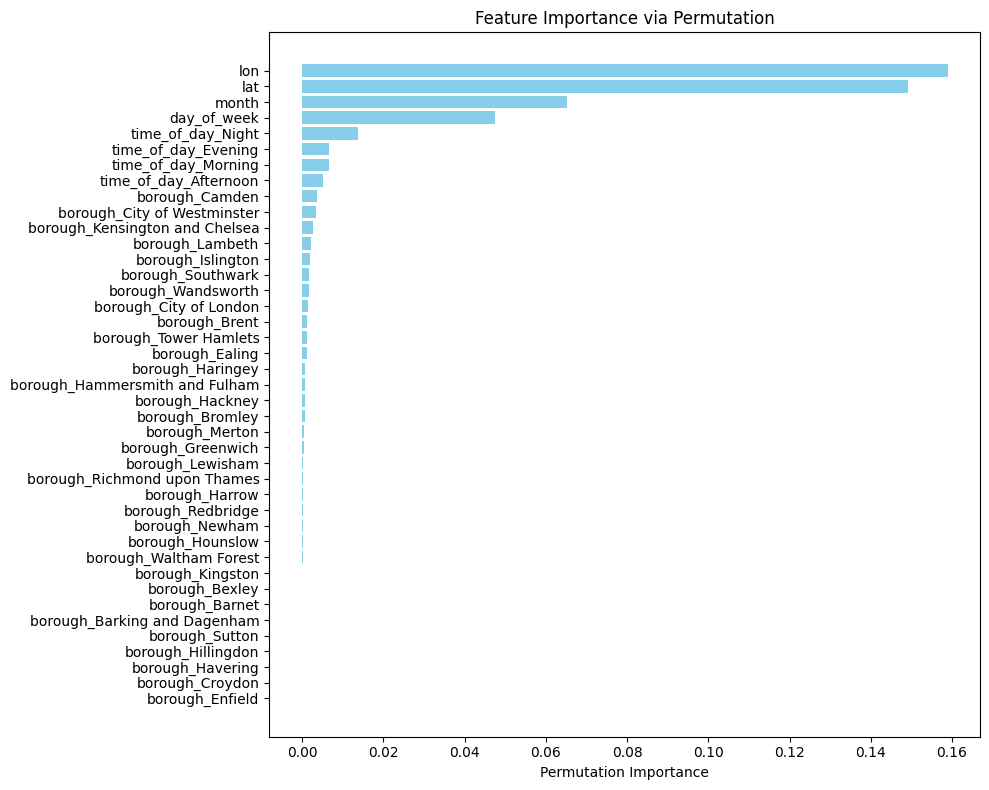

In [37]:
model_test, gs_test = analyze_balancing_approaches(df_merged, approach="test_only")


In [ ]:

def analyze_features(
    df_merged,
    mode="borough",      
    approach="train_only",
    shuffle_data=True,
    param_grid=None,
    random_state=42
):
   

    if 'severity' not in df_merged.columns:
        raise ValueError("The DataFrame must contain 'severity' as the target.")

    df_copy = df_merged.copy()

    borough_cols = [col for col in df_copy.columns if col.startswith('borough_')]
    if mode == "borough":
        drop_cols = ['lat', 'lon']
        for c in drop_cols:
            if c in df_copy.columns:
                df_copy.drop(columns=[c], inplace=True)
    elif mode == "lat_lon":
        df_copy.drop(columns=borough_cols, inplace=True, errors='ignore')
    elif mode == "all":
        pass
    else:
        raise ValueError("mode must be one of ['borough', 'lat_lon', 'all']")

    if param_grid is None:
        param_grid = {
            'learning_rate': [0.2, 0.3],
            'max_depth': [9, 11],
            'subsample': [0.8, 1.0],  
     
        }

    X = df_copy.drop(columns=['severity'])
    y = df_copy['severity']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        stratify=y,
        shuffle=shuffle_data,
        random_state=random_state
    )

    if approach == "none":
        X_train_res, y_train_res = X_train.copy(), y_train.copy()
        X_test_res, y_test_res   = X_test.copy(), y_test.copy()

    elif approach == "entire":
        adasyn_entire = ADASYN(random_state=random_state)
        X_train_res, y_train_res = adasyn_entire.fit_resample(X_train, y_train)

        adasyn_entire_test = ADASYN(random_state=random_state + 1)
        X_test_res, y_test_res = adasyn_entire_test.fit_resample(X_test, y_test)

    elif approach == "train_only":
        adasyn_train = ADASYN(random_state=random_state)
        X_train_res, y_train_res = adasyn_train.fit_resample(X_train, y_train)

        X_test_res, y_test_res = X_test.copy(), y_test.copy()

    elif approach == "test_only":
        X_train_res, y_train_res = X_train.copy(), y_train.copy()

        adasyn_test = ADASYN(random_state=random_state)
        X_test_res, y_test_res = adasyn_test.fit_resample(X_test, y_test)

    else:
        raise ValueError("approach must be one of ['none','entire','train_only','test_only']")

    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_res)

    xgb_model = XGBClassifier(
        objective='multi:softprob',
        num_class=len(np.unique(y)), 
        eval_metric='mlogloss',
        random_state=random_state,
        n_jobs=-1
    )

    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='f1_macro',
        cv=3,
        verbose=2,
        n_jobs=-1
    )

    grid_search.fit(X_train_res, y_train_res, sample_weight=sample_weights)
    model = grid_search.best_estimator_

    print("\n===== Grid Search Results =====")
    print("Best Parameters:", grid_search.best_params_)
    print("Best F1 (CV):", grid_search.best_score_)

    y_pred = model.predict(X_test_res)

    print("\n===== Classification Report (Test) =====")
    print(classification_report(
        y_test_res, y_pred,
        target_names=['Slight', 'Serious', 'Fatal'],
        digits=3
    ))

    cm = confusion_matrix(y_test_res, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Slight','Serious','Fatal'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix: {mode} | {approach}")
    plt.show()

    y_proba = model.predict_proba(X_test_res)
    auc_test = roc_auc_score(y_test_res, y_proba, multi_class='ovr')
    print(f"\nAUC (Test) = {auc_test:.3f}")

    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    plt.figure(figsize=(8, 6))
    plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx], color="skyblue")
    plt.xlabel("Feature Importance (XGBoost built-in)")
    plt.title(f"Feature Importance by Gain ({mode} | {approach})")
    plt.tight_layout()
    plt.show()

    r_train = permutation_importance(
        model,
        X_train_res,
        y_train_res,
        n_repeats=30,
        random_state=random_state
    )
    perm_sorted_idx = r_train.importances_mean.argsort()

    plt.figure(figsize=(8, 6))
    plt.barh(X_train.columns[perm_sorted_idx],
             r_train.importances_mean[perm_sorted_idx],
             color="skyblue")
    plt.xlabel("Permutation Importance")
    plt.title(f"Permutation Importance ({mode} | {approach})")
    plt.tight_layout()
    plt.show()

    return model, grid_search


Borough columns only, resample train only (common approach)

Fitting 3 folds for each of 8 candidates, totalling 24 fits

===== Grid Search Results =====
Best Parameters: {'learning_rate': 0.3, 'max_depth': 11, 'subsample': 0.8}
Best F1 (CV): 0.8030335765335122

===== Classification Report (Test) =====
              precision    recall  f1-score   support

      Slight      0.894     0.774     0.830      8613
     Serious      0.268     0.471     0.342      1465
       Fatal      0.022     0.042     0.028        48

    accuracy                          0.727     10126
   macro avg      0.395     0.429     0.400     10126
weighted avg      0.799     0.727     0.755     10126



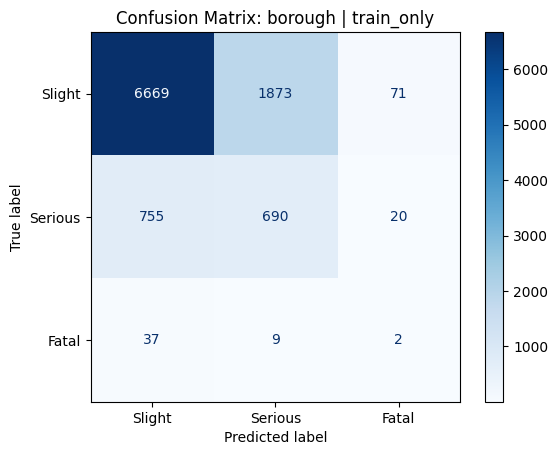


AUC (Test) = 0.753


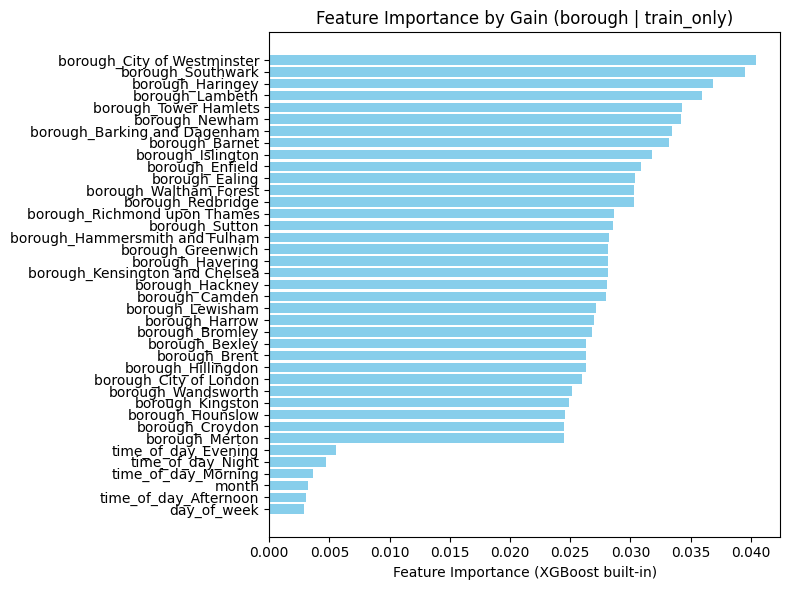

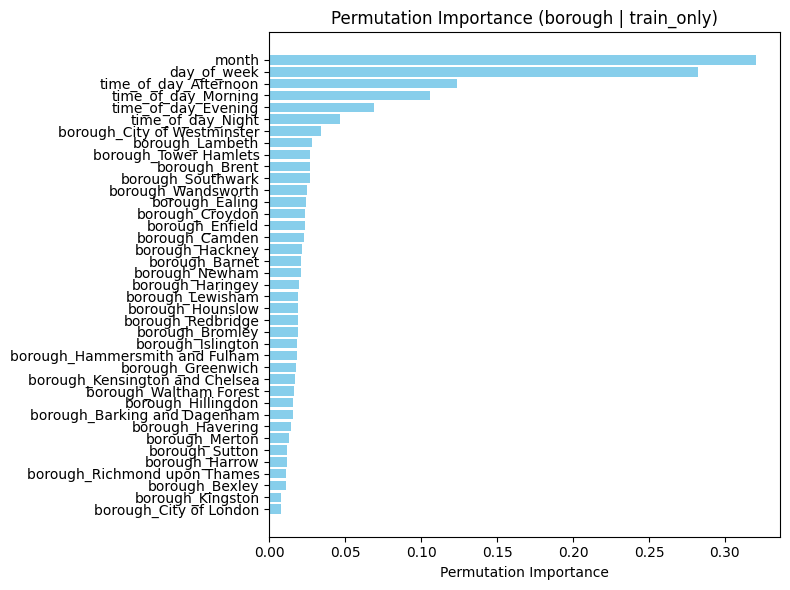

In [ ]:

model_borough_train, gs_borough_train = analyze_features(
    df_merged, 
    mode="borough", 
    approach="train_only"
)

Lat/Lon only, resample train only


Fitting 3 folds for each of 8 candidates, totalling 24 fits

===== Grid Search Results =====
Best Parameters: {'learning_rate': 0.3, 'max_depth': 11, 'subsample': 0.8}
Best F1 (CV): 0.8185746361469192

===== Classification Report (Test) =====
              precision    recall  f1-score   support

      Slight      0.961     0.850     0.902      8613
     Serious      0.492     0.791     0.607      1465
       Fatal      0.201     0.646     0.307        48

    accuracy                          0.841     10126
   macro avg      0.551     0.762     0.605     10126
weighted avg      0.890     0.841     0.857     10126



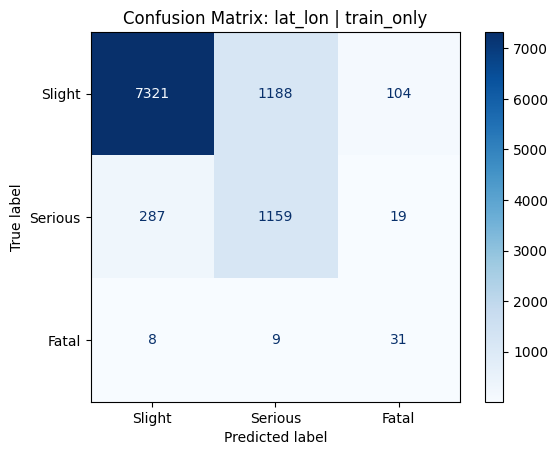


AUC (Test) = 0.868


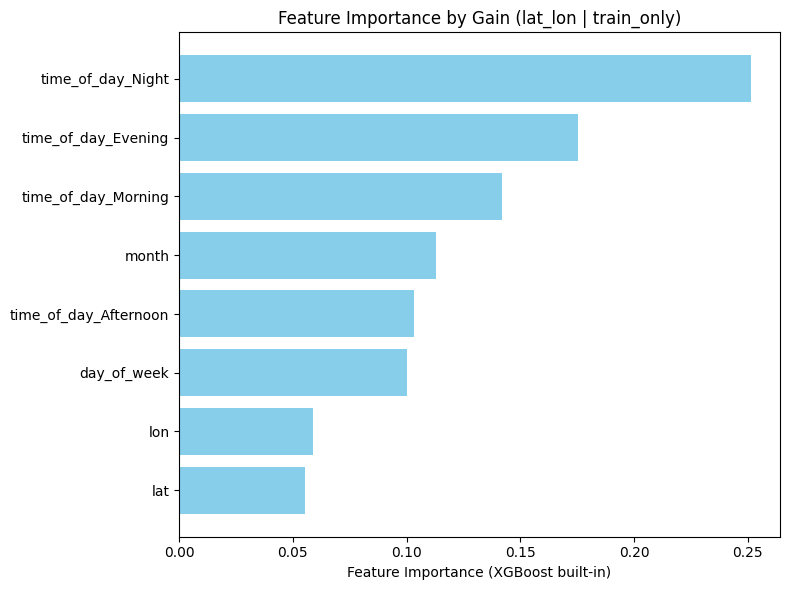

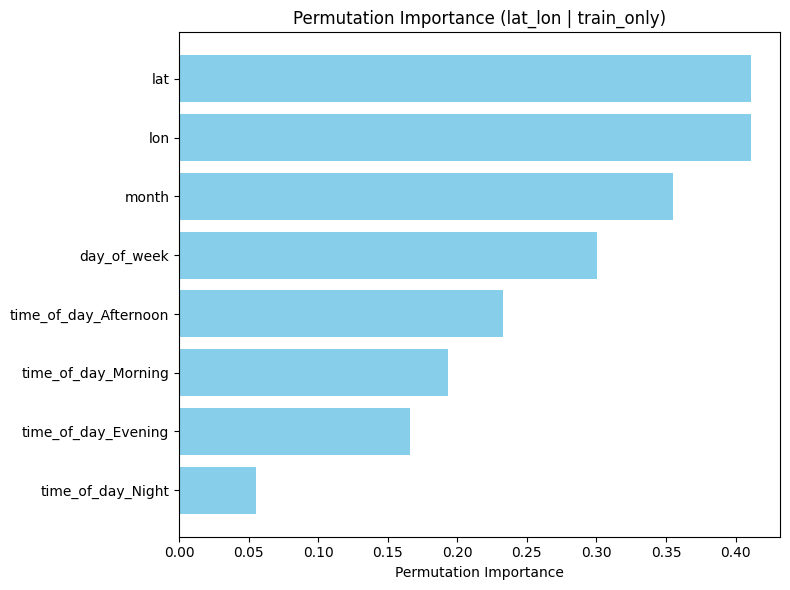

In [ ]:

model_latlon_train, gs_latlon_train = analyze_features(
    df_merged, 
    mode="lat_lon", 
    approach="train_only"
)

## Conclusion

 the strongest overall approach, based on your results, is train-only resampling with lat/lon features, as it yields a notably higher AUC and more robust detection of minority classes.

__________________________________________________________________________________
__________________________________________________________________________________
__________________________________________________________________________________
__________________________________________________________________________________


# NOTES SECTION

## 3 OPTIONS:

* Forecasting
 * Determine out of the dataset what would happen
 * Predict accidents most likely
 * we could use past year data and compare directly with more recent data

* Corelating variables
 * Finding relationship betweetn different variables
 * expanding knowledge base to variables such as
 * Street direction, speed limit, street light, roundabout presence
 * tackle problems that normal statistics patterns or resarch can struggle with
 * Anomaly detection


* Optimization
 * Optimize the dataset
 * Most likely determining the best way to have the London transportation system
 * A simulation, hard to determine results




We could study what subjects are more at risk of severe accidents

What parts of the city are the most at risk

For insurance purposes


IDEA:
We could study the correlation between variables and accidents -> building a cost function to determine the reliability of a certain subject
Could be useful for INSURANCE COMPANIES